In [10]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from scipy import ndimage as ndi
from skimage import *
from skimage import io, transform, feature

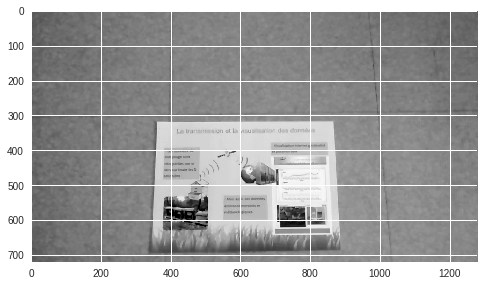

In [11]:
img = img_as_float(io.imread('x00.png', as_grey=True))
plt.imshow(img, cmap='gray')

In [12]:
%%time

eps = 1e-6

edges = feature.canny(img, sigma=3)
lines = transform.probabilistic_hough_line(edges, threshold=100)

def is_parallel(v1, v2, th=0.99):
    len1 = math.sqrt(v1[0] * v1[0] + v1[1] * v1[1])
    len2 = math.sqrt(v2[0] * v2[0] + v2[1] * v2[1])
    if len1 <= eps or len2 <= eps:
        return True
    cos = ((v1[0] * v2[0] + v1[1] * v2[1])) / (len1 * len2)
    return math.fabs(cos) > th

merged = [False for _ in range(len(lines))]
for i in range(len(lines)):
    if merged[i]:
        continue
        
    for j in range(i + 1, len(lines)):
        if merged[j]:
            continue
            
        a, b = lines[i]
        c, d = lines[j]
        vab = (b[0] - a[0]), (b[1] - a[1])
        vcd = (d[0] - c[0]), (d[1] - c[1])
        vac = (c[0] - a[0]), (c[1] - a[1])
        vad = (d[0] - a[0]), (d[1] - a[1])
        if is_parallel(vab, vcd) and is_parallel(vac, vad):
            merged[j] = True

mls = [lines[i] for i in range(len(lines)) if not merged[i]]

CPU times: user 261 ms, sys: 681 µs, total: 262 ms
Wall time: 263 ms


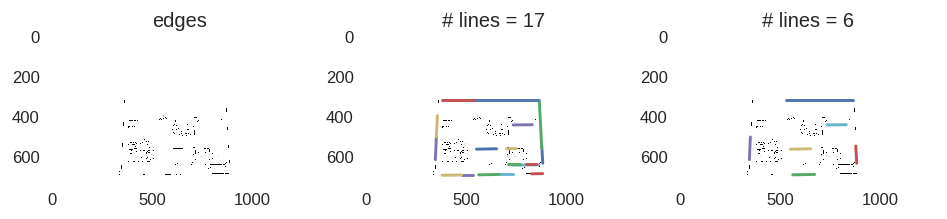

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=3, dpi=120)

axes[0].imshow(edges)
axes[0].set_title('edges')

axes[1].imshow(edges)
axes[1].set_title('# lines = {}'.format(len(lines)))
for ((x0, y0), (x1, y1)) in lines:
    axes[1].plot((x0, x1), (y0, y1))

axes[2].imshow(edges)
axes[2].set_title('# lines = {}'.format(len(mls)))
for ((x0, y0), (x1, y1)) in mls:
    axes[2].plot((x0, x1), (y0, y1))

fig.tight_layout()
plt.show()